In [1]:
import numpy as np
from dezero import Variable
import dezero.functions as F
import matplotlib.pyplot as plt

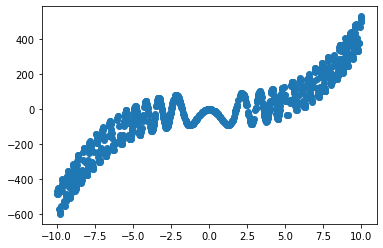

In [16]:
np.random.seed(0)
x = np.random.rand(1000, 1) * 20 - 10 
# y = np.sin(2 * np.pi * x) + np.random.rand(500, 1)
y = 0.5 * x**3 - 0.5 * x**2 - 90 * np.sin(x**2) + 1
plt.scatter(x, y)

In [17]:
# 가중치 초기화
I, H, O = 1, 10, 1
W1 = Variable(0.01 * np.random.randn(I, H))
b1 = Variable(np.zeros(H))
W2 = Variable(0.01 * np.random.randn(H, O))
b2 = Variable(np.zeros(O))

In [18]:
# 추론 함수
def predict(x):
    y = F.linear(x, W1, b1)
    y = F.sigmoid(y)
    y = F.linear(y, W2, b2)
    return y

In [19]:
lr = 0.2
iters = 20000

In [ ]:
# 학습
for i in range(iters):
    y_pred = predict(x)
    loss = F.mean_squared_error(y, y_pred)
    
    W1.cleargrad()
    b1.cleargrad()
    W2.cleargrad()
    b2.cleargrad()
    loss.backward()
    
    W1.data -= lr * W1.grad.data
    b1.data -= lr * b1.grad.data
    W2.data -= lr * W2.grad.data
    b2.data -= lr * b2.grad.data
    if i % 1000 == 0: # 1000회마다 출력
        print(loss)

variable(40848.32963833196)
variable(21434.1292879383)
variable(21272.95690443998)
variable(21271.209118661165)
variable(21271.02395006713)
variable(21271.91856399267)
variable(21270.627188456456)
variable(21269.22615979284)
variable(21263.185512857355)
variable(23666.535018518574)
variable(23666.495590750837)
variable(23666.46368426892)
variable(23666.43730883633)
variable(23666.415126198845)
variable(23666.396199394556)
variable(23666.379852527312)


In [ ]:
# Plot
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
t = np.arange(0, 1, .01)[:, np.newaxis]
y_pred = predict(t)
plt.plot(t, y_pred.data, color='r')
plt.show()